### **Customer Segmentation Analysis**

##### **Purpose of Customer Segmentation:**
The goal of this analysis is to move beyond a one-size-fits-all approach by dividing the customer base into distinct groups with similar characteristics. This allows for more effective, targeted business
strategies.

**Segmentation Definations:** 

| **Segment Persona** | **Data Profile (Who they are)** | **Targeted Business Actions (What we can do)** |
| :--- | :--- | :--- |
| **Champions** | **High Income, High Spenders, Recent Buyers.** Your best and most profitable customers. | **Goal: Reward & Retain.** <br/> - Grant early access to new products. <br/> - Invite to a VIP loyalty program. <br/> - Send exclusive, non-discount offers. |
| **At-Risk Customers** | **Used to purchase frequently, but haven't in a long time.** High `Recency` score. | **Goal: Win Them Back.** <br/> - Launch a targeted "We Miss You!" email campaign. <br/> - Offer a special, personalized discount to entice a return visit. <br/> - Ask for feedback via a survey. |
| **Budget-Conscious Parents** | **Multiple kids, moderate income, frequently use discounts.** | **Goal: Increase Purchase Frequency.** <br/> - Promote family-sized bundles and value packs. <br/> - Send notifications about sales and discount opportunities. <br/> - Highlight affordable products. |
| **Newcomers** | **Low time with the company, few purchases.** Just getting to know your brand. | **Goal: Nurture & Grow.** <br/> - Send a welcome email series introducing your brand's value. <br/> - Offer a small discount on their second purchase to encourage a habit. <br/> - Guide them to create an account or sign up for the newsletter. |

##### **Project Goal & Features:**

We aim to use K-Means clustering (an unsupervised learning algorithm) to identify and create distinct customer 'personas'. The model will group customers based on a core set of features:

- **Demographics & Family:** 'Age', 'Income', 'Total_Kids'
- **Purchase Behavior:** 'Total_Spent', 'Total_Purchases'
- **Engagement & Loyalty:** 'Recency', 'Customer_Since_Days'

##### **Business Value:**

1.  **Targeted Marketing:** Designing personalized campaigns that resonate with each persona, improving marketing ROI and reducing customer fatigue.
2.  **Customer Retention:** Proactively identifying 'at-risk' segments (e.g., those with high recency) and launching targeted retention campaigns.
3.  **Personalization & Product Development:** Enhancing the customer experience by tailoring product recommendations and using segment insights to guide strategic decisions.


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score 

# Configure plot style
sns.set_style('whitegrid')

# set up to view all the info of the columns
pd.set_option('display.max_columns', None)

In [122]:
df = pd.read_csv('marketing data/marketing_data_with_features.csv')
df.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Is_Parent,Total_Kids,Marital_Status_Simplified,Total_Spent,MntWines_Share,MntFruits_Share,MntMeatProducts_Share,MntFishProducts_Share,MntSweetProducts_Share,MntGoldProds_Share,Total_Purchases,Avg_Spend_per_Purchase,Deal_Rate,Web_Purchase_Share,Web_Visit_to_Purchase_Ratio,Is_Online_Buyer,Customer_Since_Days,Is_Active,Lifetime_Spend_per_Day,Total_Accepted_Campaigns,Campaign_Response_Rate,Is_Responder
0,1970,Graduation,84835,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,55,0,0,Single,1190,0.158824,0.087395,0.318487,0.093277,0.158824,0.183193,15,79.333333,0.066667,0.266667,0.200,0,3486,1,0.341365,0,0.0,1
1,1961,Graduation,57091,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,64,0,0,Single,577,0.804159,0.008666,0.110919,0.012132,0.000000,0.064125,18,32.055556,0.055556,0.388889,0.625,0,3487,1,0.165472,1,0.2,1
2,1958,Graduation,67267,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,67,1,1,Partnered,251,0.533865,0.043825,0.235060,0.059761,0.007968,0.119522,11,22.818182,0.090909,0.272727,0.500,0,3520,1,0.071307,0,0.0,0
3,1967,Graduation,32474,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,58,1,2,Partnered,11,0.909091,0.000000,0.090909,0.000000,0.000000,0.000000,4,2.750000,0.250000,0.250000,3.500,0,3522,1,0.003123,0,0.0,0
4,1989,Graduation,21474,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,36,1,1,Single,91,0.065934,0.175824,0.263736,0.120879,0.000000,0.373626,8,11.375000,0.250000,0.375000,1.750,1,3555,1,0.025598,1,0.2,1


##### **1. Feature Selection and Preprocessing**

In [123]:
# For clustering, select relevant features that describe customer behavior and value.
features = ['Income',
    'Total_Kids',
    'Recency',
    'Total_Spent',
    'Total_Purchases',
    'Age',
    'Deal_Rate',
    'Customer_Since_Days'
]
X = df[features].copy()

In [124]:
# Impute missing values (if any) with the median
def missing_value_imputation(X):
    print('Missing values before imputation:')
    print(X.isnull().sum())
    for col in X.columns:
        if X[col].isnull().any():
            median_val = X[col].median()
            X[col].fillna(median_val, inplace=True)
    print('\nMissing values after imputation:')
    print(X.isnull().sum())
    return X

X = missing_value_imputation(X)

Missing values before imputation:
Income                 0
Total_Kids             0
Recency                0
Total_Spent            0
Total_Purchases        0
Age                    0
Deal_Rate              0
Customer_Since_Days    0
dtype: int64

Missing values after imputation:
Income                 0
Total_Kids             0
Recency                0
Total_Spent            0
Total_Purchases        0
Age                    0
Deal_Rate              0
Customer_Since_Days    0
dtype: int64


In [125]:
# Scale the features, as K-Means is a distance-based algorithm.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features have been scaled.")

Features have been scaled.


##### **2. Perform K-Means clustering**

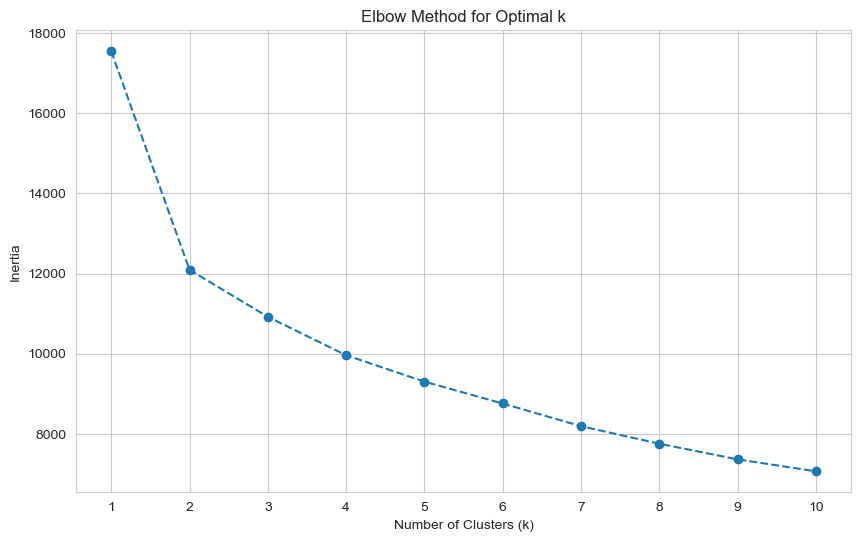

In [126]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.show()

Silhouette Score for k = 2: 0.2862
Silhouette Score for k = 3: 0.2109
Silhouette Score for k = 4: 0.1721
Silhouette Score for k = 5: 0.1724
Silhouette Score for k = 6: 0.1578
Silhouette Score for k = 7: 0.1579
Silhouette Score for k = 8: 0.1587
Silhouette Score for k = 9: 0.1593


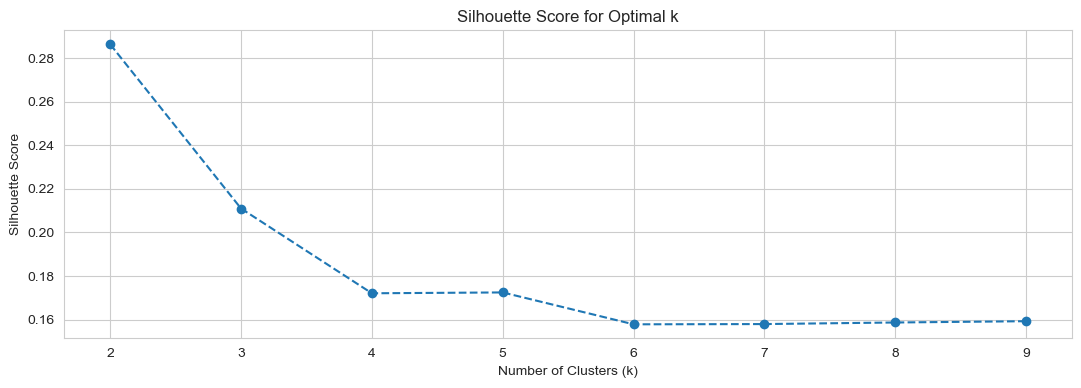

We have selected the optimal k = 2


In [127]:
# Determine Optimal Number of Clusters (Elbow Method)    
silhouette_scores = []
k_range = range(2, 10)  # Silhouette score is defined for k >= 2

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k = {k}: {score:.4f}")

# Plot the elbow curve
plt.figure(figsize=(13, 4))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(k_range)
plt.show()

# Automatically select the best k
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"We have selected the optimal k = {optimal_k}")

In [128]:
# Apply K-Means and Analyze Segments
# Since we need to segment on the basis of business problems, we will use the optimal_k = 4
optimkal_k = 4 
kmeans = KMeans(n_clusters = optimkal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

##### **3. Assign Business Value Personas to Segments**

In [129]:
cluster_map = {}
segment_analysis = df.groupby('Cluster')[features].mean()
segment_analysis

,Income,Total_Kids,Recency,Total_Spent,Total_Purchases,Age,Deal_Rate,Customer_Since_Days
Cluster,,,,,,,,
0,41240.994937,2.083544,51.032911,137.916456,9.964557,60.445570,0.308492,3786.969620
1,58925.025168,1.068792,47.256711,770.800336,21.053691,61.201342,0.157486,3886.538591
2,78471.093809,0.127580,50.448405,1399.431520,20.461538,56.285178,0.055136,3816.091932
3,31994.491779,0.832586,48.611360,104.512706,7.792227,49.236173,0.225104,3804.289985


**3.1 Mapping Champions Segments (High Income, High Spenders, High Recency)**

In [130]:
temp_analysis = segment_analysis.copy()
champions_cluster = temp_analysis['Total_Spent'].idxmax()
cluster_map[champions_cluster] = 'Champions'

## Drop Champions to find other segements. We do this so that we dont suggest same segment to other clusters
temp_analysis.drop(champions_cluster, inplace=True)

In [131]:
temp_analysis

,Income,Total_Kids,Recency,Total_Spent,Total_Purchases,Age,Deal_Rate,Customer_Since_Days
Cluster,,,,,,,,
0,41240.994937,2.083544,51.032911,137.916456,9.964557,60.445570,0.308492,3786.969620
1,58925.025168,1.068792,47.256711,770.800336,21.053691,61.201342,0.157486,3886.538591
3,31994.491779,0.832586,48.611360,104.512706,7.792227,49.236173,0.225104,3804.289985


**3.2 Mapping At-Risk Customers (who haven't purchased in a while, i.e, high recency)**

In [132]:
at_risk_cluster = temp_analysis['Recency'].idxmax()
cluster_map[at_risk_cluster] = 'At-Risk Customers'
temp_analysis.drop(at_risk_cluster, inplace=True)

In [133]:
temp_analysis

,Income,Total_Kids,Recency,Total_Spent,Total_Purchases,Age,Deal_Rate,Customer_Since_Days
Cluster,,,,,,,,
1,58925.025168,1.068792,47.256711,770.800336,21.053691,61.201342,0.157486,3886.538591
3,31994.491779,0.832586,48.611360,104.512706,7.792227,49.236173,0.225104,3804.289985


**3.3 Mapping Budget Conscious Parents (low income, low total spent, high deal rate)**

In [134]:
if not temp_analysis.empty:
    # Define the features for scoring this specific persona
    scoring_features = ['Income', 'Total_Spent', 'Deal_Rate', 'Total_Kids']
    scoring_df = temp_analysis[scoring_features]

    # Scale features to a 0-1 range to make them comparable
    scaler = MinMaxScaler()
    scaled_scoring_df = pd.DataFrame(scaler.fit_transform(scoring_df), columns=scoring_df.columns, index=scoring_df.index)

    # Create a 'Budget Score': we want LOW income/spent and HIGH deals/kids
    # We invert the metrics where 'low' is good (e.g., 1 - scaled_income)
    scaled_scoring_df['budget_score'] = ( (1 - scaled_scoring_df['Income']) +
                                          (1 - scaled_scoring_df['Total_Spent']) +
                                          scaled_scoring_df['Deal_Rate'] +
                                          scaled_scoring_df['Total_Kids'] )

    # The cluster with the highest score is our target segment
    parents_cluster = scaled_scoring_df['budget_score'].idxmax()
    cluster_map[parents_cluster] = 'Budget-Conscious Parents'
    temp_analysis.drop(parents_cluster, inplace=True)

In [135]:
temp_analysis

,Income,Total_Kids,Recency,Total_Spent,Total_Purchases,Age,Deal_Rate,Customer_Since_Days
Cluster,,,,,,,,
1,58925.025168,1.068792,47.256711,770.800336,21.053691,61.201342,0.157486,3886.538591


**3.4 Mapping New Comers (low total Purchases, low enrollment with store)**

In [136]:
if not temp_analysis.empty:
    cluster_map[temp_analysis.index[0]] = 'Newcomers'
    
df['Segment'] = df['Cluster'].map(cluster_map)

print("Personal mapping complete:")
print(df[['Cluster', 'Segment']].value_counts().sort_index())

Personal mapping complete:
Cluster  Segment                 
0        At-Risk Customers           395
1        Newcomers                   596
2        Champions                   533
3        Budget-Conscious Parents    669
Name: count, dtype: int64


##### **4. Visualize the Customer Segments formed**

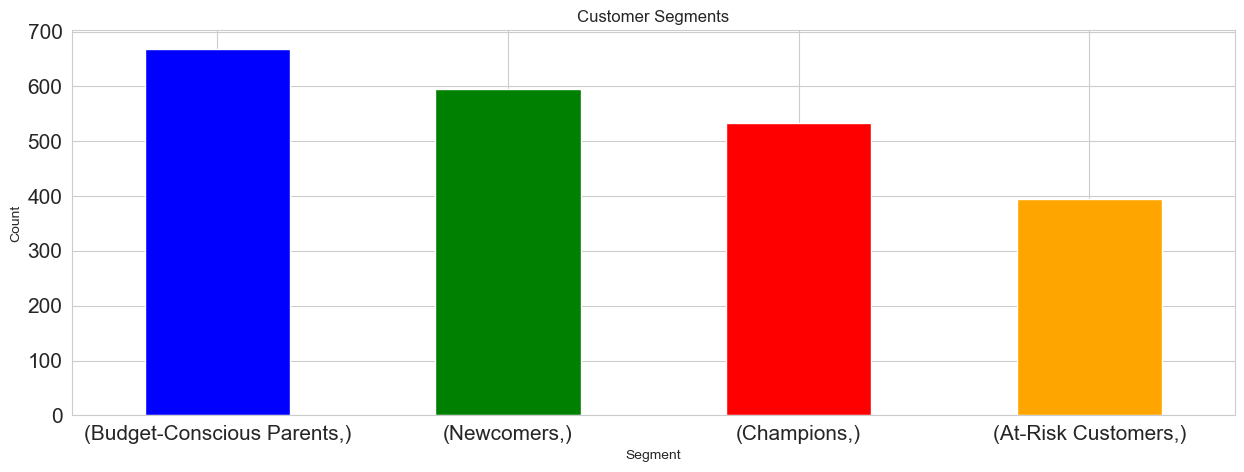

In [137]:
df[['Segment']].value_counts().plot(kind='bar', figsize=(15,5), 
                                    color=['blue', 'green', 'red', 'orange'], 
                                    xlabel='Segment',ylabel='Count', title='Customer Segments',
                                    rot=0, fontsize=15)
plt.savefig('./Images/customer_segments_bar.png', bbox_inches='tight')

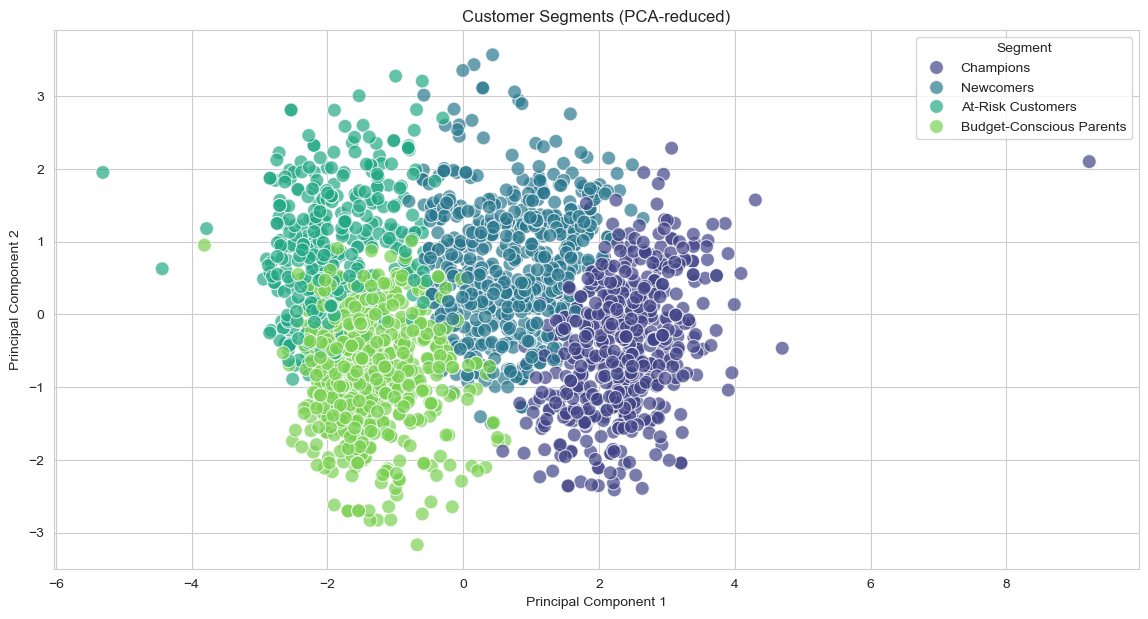

In [138]:
# Use PCA to reduce dimensionality to 2D for a holistic view.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Visualize the clusters using the two principal components
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Segment', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segments (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Segment')
plt.savefig('./Images/customer_segments_pca.png', bbox_inches='tight')
plt.show()

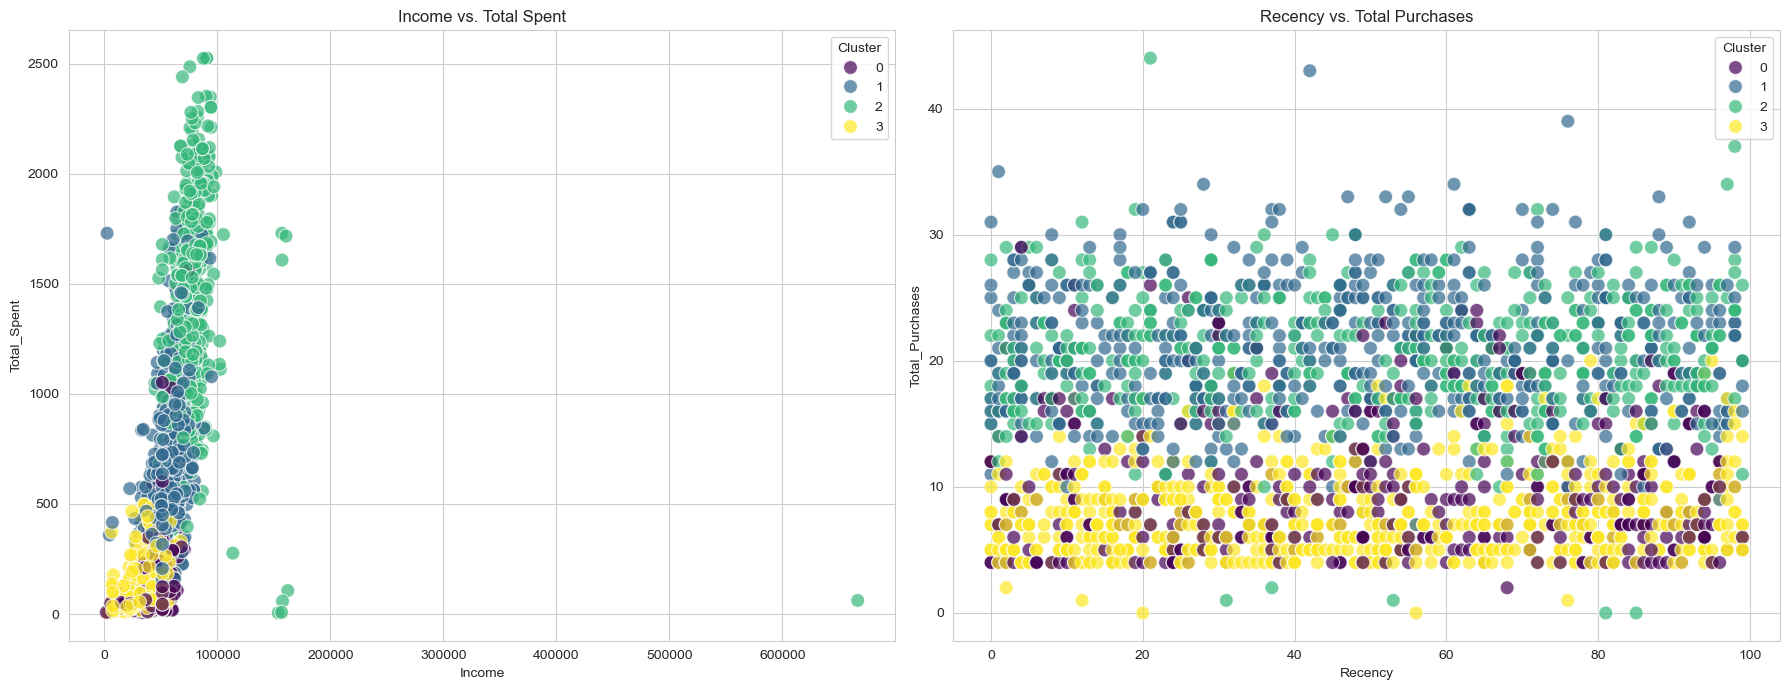

In [139]:
# Create scatter plots for some of the most important original features.
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Income vs. Total Spent
sns.scatterplot(ax=axes[0], data=df, x='Income', y='Total_Spent', hue='Cluster', palette='viridis', s=100, alpha=0.7)
axes[0].set_title('Income vs. Total Spent')

# Recency vs. Total Purchases
sns.scatterplot(ax=axes[1], data=df, x='Recency', y='Total_Purchases', hue='Cluster', palette='viridis', s=100, alpha=0.7)
axes[1].set_title('Recency vs. Total Purchases')

plt.tight_layout()
plt.show()

In [140]:
# store the file
df.reset_index(drop=True)
df.drop(columns=['PCA1', 'PCA2'], inplace=True)
df.to_csv('marketing data/marketing_data_with_segments.csv', index=False)